In [ ]:
# # Feature Engineering

# ## İş Problemi

# Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını tahmin 
# edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir. Modeli 
# geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını 
# gerçekleştirmeniz beklenmektedir.

# ## Veri Seti Hikayesi
# Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır. ABD'deki
# Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan Pima Indian kadınları üzerinde
# yapılan diyabet araştırması için kullanılan verilerdir.

# Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.

# 9 Değişken 768 Gözlem 24 KB

# Pregnancies Hamilelik sayısı
# Glucose Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu
# Blood Pressure Kan Basıncı (Küçük tansiyon) (mm Hg)
# SkinThickness Cilt Kalınlığı
# Insulin 2 saatlik serum insülini (mu U/ml)
# DiabetesPedigreeFunction Soydaki kişilere göre diyabet olma ihtimalini hesaplayan bir fonksiyon
# BMI Vücut kitle endeksi
# Age Yaş (yıl)
# Outcome Hastalığa sahip (1) ya da değil (0)

 
# ## Proje Görevleri
 
# #### Görev 1 : Keşifçi Veri Analizi
# Adım 1: Genel resmi inceleyiniz.
# Adım 2: Numerik ve kategorik değişkenleri yakalayınız.
# Adım 3: Numerik ve kategorik değişkenlerin analizini yapınız.
# Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre 
# numerik değişkenlerin ortalaması)
# Adım 5: Aykırı gözlem analizi yapınız.
# Adım 6: Eksik gözlem analizi yapınız.
# Adım 7: Korelasyon analizi yapınız.

# ####  Görev 2 : Feature Engineering
# Adım 1: Eksik ve aykırı değerler için gerekli işlemleri yapınız. Veri setinde eksik gözlem bulunmamakta ama Glikoz, Insulin vb. 
# değişkenlerde 0 değeri içeren gözlem birimleri eksik değeri ifade ediyor olabilir. Örneğin; bir kişinin glikoz veya insulin değeri 0 
# olamayacaktır. Bu durumu dikkate alarak sıfır değerlerini ilgili değerlerde NaN olarak atama yapıp sonrasında eksik 
# değerlere işlemleri uygulayabilirsiniz.
# Adım 2: Yeni değişkenler oluşturunuz.
# Adım 3: Encoding işlemlerini gerçekleştiriniz.
# Adım 4: Numerik değişkenler için standartlaştırma yapınız.
# Adım 5: Model oluşturunuz.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

## Proje Görevleri


In [ ]:
# #### Görev 1 : Keşifçi Veri Analizi
# Adım 1: Genel resmi inceleyiniz.
# Adım 2: Numerik ve kategorik değişkenleri yakalayınız.
# Adım 3: Numerik ve kategorik değişkenlerin analizini yapınız.
# Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre 
# numerik değişkenlerin ortalaması)
# Adım 5: Aykırı gözlem analizi yapınız.
# Adım 6: Eksik gözlem analizi yapınız.
# Adım 7: Korelasyon analizi yapınız.

In [340]:
def load():
    data = pd.read_csv("diabetes.csv")
    #data = pd.read_csv("C:\\Users\\Msı\\Desktop\\Kaggle\\df_created2_29072022",index_col=0)
    return data

df = load()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1


In [285]:
target="Outcome"

In [341]:
# Glucose ve Insulin değerleri 0 olamaz. demekki NAN değerler
df.loc[df[df["Glucose"]==0]["Glucose"].index,"Glucose"]=np.nan
df.loc[df[df["Insulin"]==0]["Insulin"].index,"Insulin"]=np.nan
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [191]:
def grab_col_names(dataframe):
    
    cat_th=len(df)//20
    car_th=len(df)//20
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}'," ---- ",cat_cols)
    print(f'num_cols: {len(num_cols)}'," ---- ",num_cols)
    print(f'cat_but_car: {len(cat_but_car)}'," ---- ",cat_but_car)
    print(f'num_but_cat: {len(num_but_cat)}'," ---- ",num_but_cat)
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 2  ----  ['Pregnancies', 'Outcome']
num_cols: 7  ----  ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
cat_but_car: 0  ----  []
num_but_cat: 2  ----  ['Pregnancies', 'Outcome']


   Pregnancies  Ratio
1          135 17.578
0          111 14.453
2          103 13.411
3           75  9.766
4           68  8.854
5           57  7.422
6           50  6.510
7           45  5.859
8           38  4.948
9           28  3.646
---------------------------------------------------------------------------------------------------


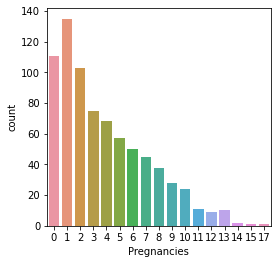

###################################################################################################
   Outcome  Ratio
0      500 65.104
1      268 34.896
---------------------------------------------------------------------------------------------------


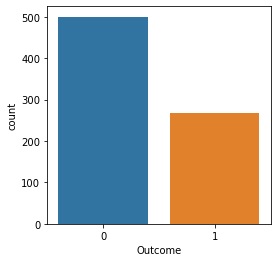

###################################################################################################


In [213]:
def cat_summary(dataframe,col_name,plot=False,
                added_new_features_for_figsize=5,
                print_first_x_rows=10):
    """
    Veri setindeki değişkenlerin değerlerinin kaç tane var olduğunu ve oranını gösterir 
    
    Parameters
    ----------
    dataframe: dataframe
        Değişken isimleri alınmak istenen dataframe'dir
    col_name: str
        dataframe'e ait kolon isimleri
    plot: bool
        Çizim yapılıp yapılmamasına karar verir
    added_new_features_for_figsize: int
        Çizim yapılacaksa resim büyüklüğünü ayarlar
    
    Returns
    -------
        
    Notes
    -------
    Çok büyük veri göndermek çıktının gecikmesine sebep olacaktır.
    
    Examples
    --------
    for col in df.columns:
        if df[col].dtypes=="bool":
            df[col]=df[col].astype(int)
        cat_summary(df,col,plot=True,added_new_features_for_figsize=4)
    
    """ 
    size=added_new_features_for_figsize
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(dropna=False).iloc[:print_first_x_rows],
                       "Ratio": 100*dataframe[col_name].value_counts(dropna=False).iloc[:print_first_x_rows]/len(dataframe)}))
    
    print("-"*99)
    if plot:
        plt.rcParams['figure.figsize']=(size,size)
        sns.countplot(x=dataframe[col_name],data=dataframe)
        plt.show(block=True)
    print("#"*99)
    
#for col in df.columns:
for col in cat_cols:
    #pd.concat([df[col].value_counts(dropna=False,normalize=True),df[col].value_counts(dropna=False)],axis=1)*100
    # bool olanda hata vermesin diye. aslında df e ilk başta bunu uygulamak daha mantıklı
    if df[col].dtypes=="bool":
        df[col]=df[col].astype(int)
    cat_summary(df,col,plot=True,added_new_features_for_figsize=4,print_first_x_rows=10)

In [214]:
def check_df(dataframe,head=5):
    
    """
    Veri setine genel bir bakış atmak için kullanılır.
    
    Parameters
    ----------
    dataframe: dataframe
        Değişken isimleri alınmak istenen dataframe'dir
    head: int
        İlk ve son kaç satır gözlenmek istendiğini belirtir
    
    Returns
    -------
        
    Notes
    -------
    
    Examples
    --------
    
    
    """    
    
    print("\n##########################################################  Shape  ##########################################################\n")
    print(dataframe.shape)
    
    print("\n##########################################################  Types  ##########################################################\n")
    print(dataframe.dtypes)
    
    print("\n##########################################################  Head  ##########################################################\n")
    print(dataframe.head(head))
    
    print("\n##########################################################  Tail  ##########################################################\n")
    print(dataframe.tail(head))
    
    print("\n##########################################################  NA  ##########################################################\n")
    print(dataframe.isnull().sum().sort_values())
    
    print("\n##########################################################  Quantiles  ##########################################################\n")
    print(dataframe.describe([0,0.05,0.95,0.99,1]).T)
    print("\n##########################################################  -------  ##########################################################\n")
    
check_df(df,head=5)


##########################################################  Shape  ##########################################################

(768, 9)

##########################################################  Types  ##########################################################

Pregnancies                   int64
Glucose                     float64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

##########################################################  Head  ##########################################################

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6  148.000             72             35      NaN 33.600                     0.627   50        1
1            1   85.000             66            

In [215]:
def find_col_modes(df,col,target):
    col_df_modes=pd.concat([df[col].value_counts(dropna=False,normalize=True),
                            df[col].value_counts(dropna=False)],axis=1)
    col_df_modes["modes"]=col_df_modes.index
    col_df_modes.columns=["modes_rate","modes_count","modes"]
    col_df_modes

    col_df_modes2=df.groupby([col]).agg({target:["mean"] })
    col_df_modes2.columns=["mean"]
    col_df_modes2["modes"]=col_df_modes2.index

    col_df_modes=col_df_modes.merge(col_df_modes2, on="modes")
    col_df_modes=col_df_modes[["modes","mean","modes_rate","modes_count"]]
    return col_df_modes
col_df_modes=find_col_modes(df,col=cat_cols[0],target=target)
col_df_modes

,modes,mean,modes_rate,modes_count
0,1,0.215,0.176,135
1,0,0.342,0.145,111
2,2,0.184,0.134,103
3,3,0.360,0.098,75
4,4,0.338,0.089,68
5,5,0.368,0.074,57
6,6,0.320,0.065,50
7,7,0.556,0.059,45
8,8,0.579,0.049,38
9,9,0.643,0.036,28


In [366]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age/Pregnancies,Age/BloodPressure,Age_,Age_qcut,Glucose_nan,Insulin_nan
0,0.353,0.671,0.590,0.354,NaN,0.501,0.234,0.483,1.000,8.333,0.694,40_+,"(42.6, 81.0]",0.000,1.000
1,0.059,0.265,0.541,0.293,NaN,0.396,0.117,0.167,0.000,31.000,0.470,30_40,"(27.0, 33.0]",0.000,1.000
2,0.471,0.897,0.525,0.000,NaN,0.347,0.254,0.183,1.000,4.000,0.500,30_40,"(27.0, 33.0]",0.000,1.000
3,0.059,0.290,0.541,0.232,0.096,0.419,0.038,0.000,0.000,21.000,0.318,0_30,"(20.999, 23.0]",0.000,0.000
4,0.000,0.600,0.328,0.354,0.185,0.642,0.944,0.200,1.000,inf,0.825,30_40,"(27.0, 33.0]",0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.588,0.368,0.623,0.485,0.200,0.490,0.040,0.700,0.000,6.300,0.829,40_+,"(42.6, 81.0]",0.000,0.000
764,0.118,0.503,0.574,0.273,NaN,0.548,0.112,0.100,0.000,13.500,0.386,0_30,"(23.0, 27.0]",0.000,1.000
765,0.294,0.497,0.590,0.232,0.118,0.390,0.071,0.150,0.000,6.000,0.417,30_40,"(27.0, 33.0]",0.000,0.000
766,0.059,0.529,0.492,0.000,NaN,0.449,0.116,0.433,1.000,47.000,0.783,40_+,"(42.6, 81.0]",0.000,1.000


In [363]:
def find_col_modes(df,col,target):
    col_df_modes=pd.concat([df[col].value_counts(dropna=False,normalize=True),
                            df[col].value_counts(dropna=False),],axis=1)
    col_df_modes["modes"]=col_df_modes.index
    col_df_modes.columns=["modes_rate","modes_count","modes"]
    col_df_modes

    col_df_modes2=df.groupby([col]).agg({target:["mean"] })
    col_df_modes2.columns=["mean"]
    col_df_modes2["modes"]=col_df_modes2.index

    col_df_modes=col_df_modes.merge(col_df_modes2, on="modes")
    col_df_modes=col_df_modes[["modes","mean","modes_rate","modes_count"]]
    return col_df_modes
col_df_modes=find_col_modes(df,col=cat_cols[0],target=target)
col_df_modes

,modes,mean,modes_rate,modes_count
0,0.059,0.215,0.176,135
1,0.000,0.342,0.145,111
2,0.118,0.184,0.134,103
3,0.176,0.360,0.098,75
4,0.235,0.338,0.089,68
5,0.294,0.368,0.074,57
6,0.353,0.320,0.065,50
7,0.412,0.556,0.059,45
8,0.471,0.579,0.049,38
9,0.529,0.643,0.036,28


In [438]:
df = load()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1


In [439]:
def find_col_modes(df,col,target):
    col_df_modes=pd.concat([df[col].value_counts(dropna=False,normalize=True),  # modes_rate
                            df[col].value_counts(dropna=False),],axis=1)  # modes_count

    col_df_modes.columns=["modes_rate","modes_count"]  # değişkenlere isimler atıyorum

    col_df_modes["modes"]=col_df_modes.index  #index te olan mode ları değişken olarak atıyorum

    col_df_modes2=df.groupby([col]).agg({target:["mean"] })
    col_df_modes2.columns=["target_mean"]
    col_df_modes2["modes"]=col_df_modes2.index
    col_df_modes2  # hedef değişkene ait mean değerlerinden yeni bir df oluşturuyorum

    col_df_modes=col_df_modes.merge(col_df_modes2, on="modes") # oluşan iki df i birleştiriyorum
    col_df_modes

    # değişkenleri istediğim sıraya göre yeniden sıralıyorum
    col_df_modes=col_df_modes[["modes","target_mean","modes_rate","modes_count"]] 

    col_df_modes["dtypes"]=df[col].dtypes
    col_df_modes["col_isna_rate"]=df[col].isna().sum()/len(df)
    col_df_modes["col_notna_rate"]=df[col].notna().sum()/len(df)
    col_df_modes["nunique"]=df[col].nunique()
    col_df_modes["uniques"]=str(df[col].unique())

    return col_df_modes
col_df_modes=find_col_modes(dfx,col=cat_cols[0],target=target)
col_df_modes

,modes,target_mean,modes_rate,modes_count,dtypes,col_isna_rate,col_notna_rate,nunique,uniques
0,1,0.215,0.176,135,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
1,0,0.342,0.145,111,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
2,2,0.184,0.134,103,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
3,3,0.360,0.098,75,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
4,4,0.338,0.089,68,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
5,5,0.368,0.074,57,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
6,6,0.320,0.065,50,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
7,7,0.556,0.059,45,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
8,8,0.579,0.049,38,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
9,9,0.643,0.036,28,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...


In [440]:
def col_df_modes_all_fonk(df,col=cat_cols[0],target="Outcome"):
    col_df_modes_all=pd.DataFrame()
    for col in df.columns:
        col_df_modes=find_col_modes(df,col=col,target=target)
        col_df_modes.insert(0, "col",0)
        col_df_modes["col"]=col
        col_df_modes_all=pd.concat([col_df_modes_all,col_df_modes],axis=0)
    return col_df_modes_all
col_df_modes_all=col_df_modes_all_fonk(dfx,col=cat_cols[0],target=target)
col_df_modes_all.index=range(len(col_df_modes_all))
col_df_modes_all

,col,modes,target_mean,modes_rate,modes_count,dtypes,col_isna_rate,col_notna_rate,nunique,uniques
0,Pregnancies,1.000,0.215,0.176,135,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
1,Pregnancies,0.000,0.342,0.145,111,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
2,Pregnancies,2.000,0.184,0.134,103,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
3,Pregnancies,3.000,0.360,0.098,75,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
4,Pregnancies,4.000,0.338,0.089,68,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
...,...,...,...,...,...,...,...,...,...,...
1251,Age,64.000,0.000,0.001,1,int64,0.000,1.000,52,[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 ...
1252,Age,70.000,1.000,0.001,1,int64,0.000,1.000,52,[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 ...
1253,Age,68.000,0.000,0.001,1,int64,0.000,1.000,52,[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 ...
1254,Outcome,0.000,0.000,0.651,500,int64,0.000,1.000,2,[1 0]


In [414]:
dfx["Outcome"].mean()

0.3489583333333333

In [416]:
col_df_modes_all[col_df_modes_all["target_mean"]<0.2][col_df_modes_all["modes_rate"]>0.03]

,col,modes,target_mean,modes_rate,modes_count,dtypes,col_isna_rate,col_notna_rate,nunique,uniques
2,Pregnancies,2.000,0.184,0.134,103,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
161,BloodPressure,60.000,0.189,0.048,37,int64,0.000,1.000,47,[ 72 66 64 40 74 50 0 70 96 92 80 ...
1202,Age,22.000,0.153,0.094,72,int64,0.000,1.000,52,[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 ...
1203,Age,21.000,0.079,0.082,63,int64,0.000,1.000,52,[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 ...
1205,Age,24.000,0.174,0.060,46,int64,0.000,1.000,52,[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 ...
1206,Age,23.000,0.184,0.049,38,int64,0.000,1.000,52,[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 ...
1254,Outcome,0.000,0.000,0.651,500,int64,0.000,1.000,2,[1 0]


In [417]:
col_df_modes_all[col_df_modes_all["target_mean"]>0.5][col_df_modes_all["modes_rate"]>0.03]

,col,modes,target_mean,modes_rate,modes_count,dtypes,col_isna_rate,col_notna_rate,nunique,uniques
7,Pregnancies,7.000,0.556,0.059,45,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
8,Pregnancies,8.000,0.579,0.049,38,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
9,Pregnancies,9.000,0.643,0.036,28,int64,0.000,1.000,17,[ 6 1 8 0 5 3 10 2 4 7 9 11 13 15 17 ...
1211,Age,31.000,0.542,0.031,24,int64,0.000,1.000,52,[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 ...
1255,Outcome,1.000,1.000,0.349,268,int64,0.000,1.000,2,[1 0]


In [216]:
def df_col_analize_(df,target):

    df_col_analize=pd.DataFrame([[col,df[col].dtypes,df[col].nunique(),df[col].unique(),
                   df[col].isna().sum(),df[col].notna().sum(),
                  find_col_modes(df,col=col,target=target)] 
                  for col in df.columns ],
                 columns=["cols","dtypes","nunique","unique","isna_sum","notna_sum","modes"]).sort_values(by="nunique")
    return df_col_analize
df_col_analize=df_col_analize_(df,target=target)
df_col_analize

,cols,dtypes,nunique,unique,isna_sum,notna_sum,modes
8,Outcome,int64,2,"[1, 0]",0,768,modes mean modes_rate modes_count 0 ...
0,Pregnancies,int64,17,"[6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15,...",0,768,modes mean modes_rate modes_count 0 ...
2,BloodPressure,int64,47,"[72, 66, 64, 40, 74, 50, 0, 70, 96, 92, 80, 60...",0,768,modes mean modes_rate modes_count 0 ...
3,SkinThickness,int64,51,"[35, 29, 0, 23, 32, 45, 19, 47, 38, 30, 41, 33...",0,768,modes mean modes_rate modes_count 0 ...
7,Age,int64,52,"[50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 5...",0,768,modes mean modes_rate modes_count 0 ...
1,Glucose,float64,135,"[148.0, 85.0, 183.0, 89.0, 137.0, 116.0, 78.0,...",5,763,modes mean modes_rate modes_count 0 ...
4,Insulin,float64,185,"[nan, 94.0, 168.0, 88.0, 543.0, 846.0, 175.0, ...",374,394,modes mean modes_rate modes_count 0 ...
5,BMI,float64,248,"[33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35....",0,768,modes mean modes_rate modes_count 0 ...
6,DiabetesPedigreeFunction,float64,517,"[0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2...",0,768,modes mean modes_rate modes_count 0 ...


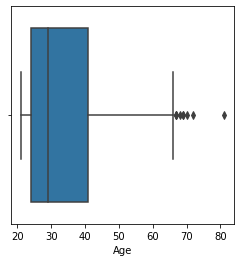

In [218]:
###################
# Grafik Teknikle Aykırı Değerler
###################

sns.boxplot(x=df["Age"])
plt.show()

In [219]:
###################
# Aykırı Değerler Nasıl Yakalanır?
###################

q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

df[(df["Age"] < low) | (df["Age"] > up)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132.000,80,0,NaN,26.800,0.186,69,0
363,4,146.000,78,0,NaN,38.500,0.520,67,1
453,2,119.000,0,0,NaN,19.600,0.832,72,0
459,9,134.000,74,33,60.000,25.900,0.460,81,0
489,8,194.000,80,0,NaN,26.100,0.551,67,0
537,0,57.000,60,0,NaN,21.700,0.735,67,0
666,4,145.000,82,18,NaN,32.500,0.235,70,1
674,8,91.000,82,0,NaN,35.600,0.587,68,0
684,5,136.000,82,0,NaN,0.000,0.640,69,0


In [220]:
def outlier_thresholds(dataframe, col_name, q1=0.03, q3=0.97):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "Age")

(-40.5, 123.5)

In [221]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [224]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

grab_outliers(df, "Age")

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [226]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

# for col in num_cols:
#     new_df = remove_outlier(df, col)

In [227]:
def replace_with_thresholds(dataframe, variable):
    #hata: buraya oran orantı ile thresoldları ata. tek sayı ile değiştirme  #!!!!!!!!!!!!!!!!!!!!!!!!!!
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

outlier_thresholds(df, "Age")
check_outlier(df, "Age")
grab_outliers(df, "Age", index=True)

remove_outlier(df, "Age").shape
replace_with_thresholds(df, "Age")
check_outlier(df, "Age")

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


False

In [228]:
# istisna olan PassengerId değişkenini siliyoruz----------------------------date, id gibi değişkenler burada gözükebiliyor.
num_cols = [col for col in num_cols if col not in "PassengerId"]

for col in num_cols:
    print(col," ---- ", check_outlier(df, col))


Glucose  ----  False
BloodPressure  ----  False
SkinThickness  ----  False
Insulin  ----  False
BMI  ----  False
DiabetesPedigreeFunction  ----  False
Age  ----  False


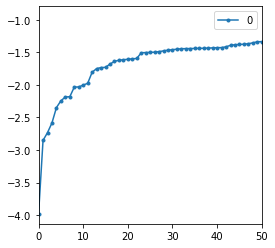

In [233]:
#############################################
# Çok Değişkenli Aykırı Değer Analizi: Local Outlier Factor
#############################################

#### tek başına aykırı olmayacak değerler birlikte aykırı değer olabilirler
#### örneğin 2-3 kez evlenmek aykırı değer değildir.
#### örneğin 17 yaşında olmak aykırı değer değildir.
#### 17, 3  >>> ama 17 yaşında 3 kez evlenmiş olmak aykırı değerdir. Buna çok değişkenli etki denir.

#### LOF Yöntemi çok değişkenli aykırı değer yöntemidir.
#### LOF Yöntemi-- 1den uzaklaştıkça outlier olma ihtimali artar.

#### LOF Yöntemi-- elimizde 100 değişken varsa bunu PCA ile iki değişkene indirgeyip 2 değişkenli gibi outlierları görselleştirebiliriz

clf = LocalOutlierFactor(n_neighbors=20) 
# öntanımlı değer 20 dir. istenirse5,10vs seçilebilir. 
#ama hangi sayı daha iyi yorumlayamayacağımız için 20yi seçmek mantıklı olabilir.
clf.fit_predict(df[['Pregnancies',  'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]) # nan değerler hata verdiği için böyle yaptım
df_scores = clf.negative_outlier_factor_
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

In [231]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [234]:
th = np.sort(df_scores)[3]
th

-2.583701830476211

In [235]:
df[df_scores < th]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
145,0,102.000,75,23,NaN,0.000,0.572,21.000,0
371,0,118.000,64,23,89.000,0.000,1.731,21.000,0
579,2,197.000,70,99,NaN,34.700,0.575,62.000,1


In [236]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
Pregnancies,768.000,3.845,3.370,0.000,0.000,0.000,3.000,6.000,9.000,13.000,17.000
Glucose,763.000,121.687,30.536,44.000,67.620,80.000,117.000,141.000,167.000,196.000,199.000
BloodPressure,768.000,69.105,19.356,0.000,0.000,38.700,72.000,80.000,88.000,106.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,0.000,23.000,32.000,40.000,51.330,99.000
Insulin,394.000,155.548,118.776,14.000,18.000,41.650,125.000,190.000,292.400,580.470,846.000
BMI,768.000,31.993,7.884,0.000,0.000,21.800,32.000,36.600,41.500,50.759,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.095,0.140,0.372,0.626,0.879,1.698,2.420
Age,768.000,33.241,11.760,21.000,21.000,21.000,29.000,41.000,51.000,67.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000


In [148]:
#df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index) # inplace olmadığı için kalıcı olarak silmedi

In [230]:
#############################################
# Missing Values (Eksik Değerler)
#############################################

#############################################
# Eksik Değerlerin Yakalanması/Analiz edilmesi
#############################################
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

na_cols =missing_values_table(df, True)
#na_cols

         n_miss  ratio
Insulin     374 48.700
Glucose       5  0.650


<!-- # #############################################
# # Eksik Değer Problemini Çözme
# ############################################# -->

#############################################
# Eksik Değer Problemini Çözme
#############################################

In [ ]:
# #############################################
# # Eksik Değer Problemini Çözme
# #############################################

# ###################
# # Çözüm 1: Hızlıca silmek
# ###################
# df.dropna().shape

# ###################
# # Çözüm 2: Basit Atama Yöntemleri ile Doldurmak
# ###################

# df["Age"].fillna(df["Age"].mean()).isnull().sum()
# df["Age"].fillna(df["Age"].median()).isnull().sum()
# df["Age"].fillna(0).isnull().sum()

# # df.apply(lambda x: x.fillna(x.mean()), axis=0)

# df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()

# dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

# dff.isnull().sum().sort_values(ascending=False)

# df["Embarked"].fillna(df["Embarked"].mode()[0]).isnull().sum()

# df["Embarked"].fillna("missing")

# df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()


# ###################
# # Çözüm 3: İleri Seviye Atama Yöntemleri ile Doldurmak
# ###################

# # df.apply(lambda x: x.fillna(x.mean()), axis=0)

# df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()



# ###################
# # Kategorik Değişken Kırılımında Değer Atama
# ###################
# df.groupby("Sex")["Age"].mean()

# df["Age"].mean()

# df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

# df.groupby("Sex")["Age"].mean()["female"]

# df.loc[(df["Age"].isnull()) & (df["Sex"]=="female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]

# df.loc[(df["Age"].isnull()) & (df["Sex"]=="male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]

# df.isnull().sum()

# # yukarıdaki işlemi farklı şekilde yapmak istersek
# df.loc[(df["Age"].isnull()) & (df["Sex"]=="female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]
# df.loc[(df["Age"].isnull()) & (df["Sex"]=="male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]




# #############################################
# # Çözüm 3: Tahmine Dayalı Atama ile Doldurma
# #############################################

# df = load()

# cat_cols, num_cols, cat_but_car = grab_col_names(df)
# num_cols = [col for col in num_cols if col not in "PassengerId"]
# dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)

# dff.head()

# # değişkenlerin standartlatırılması
# scaler = MinMaxScaler()
# dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
# dff.head()


# # knn'in uygulanması.
# # knn----uzaklık temelli bir algoritma olduğu için değişkenleri standartlaştırmalıyız.
# # cat değişkenleri one-hot-encoding yapmamızı bekler algoritma.
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
# dff.head()

# dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)

# df["age_imputed_knn"] = dff[["Age"]]

# df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]]
# df.loc[df["Age"].isnull()]


# ###################
# # Recap
# ###################

# df = load()
# # missing table
# missing_values_table(df)
# # sayısal değişkenleri direk median ile oldurma
# df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()
# # kategorik değişkenleri mode ile doldurma
# df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()
# # kategorik değişken kırılımında sayısal değişkenleri doldurmak
# df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
# # Tahmine Dayalı Atama ile Doldurma

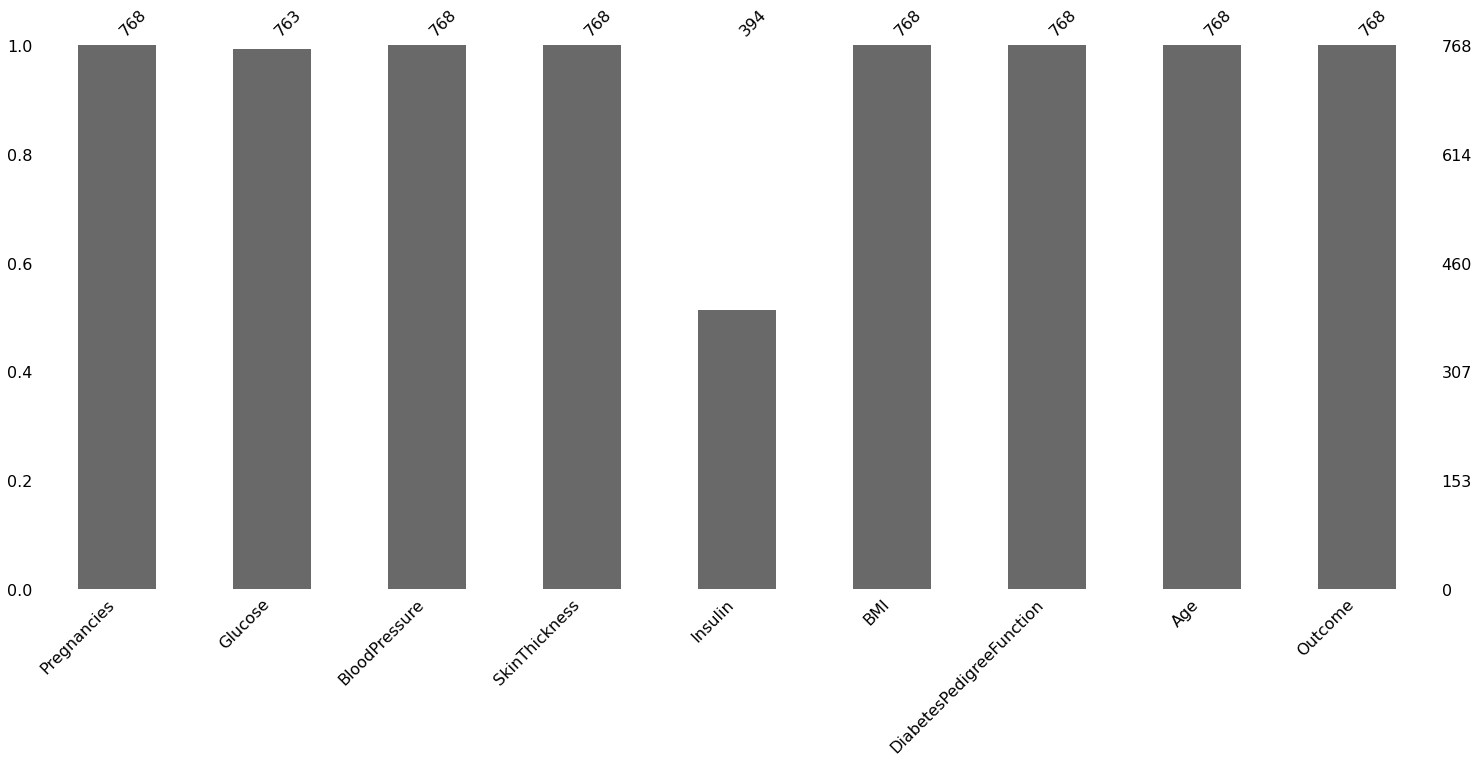

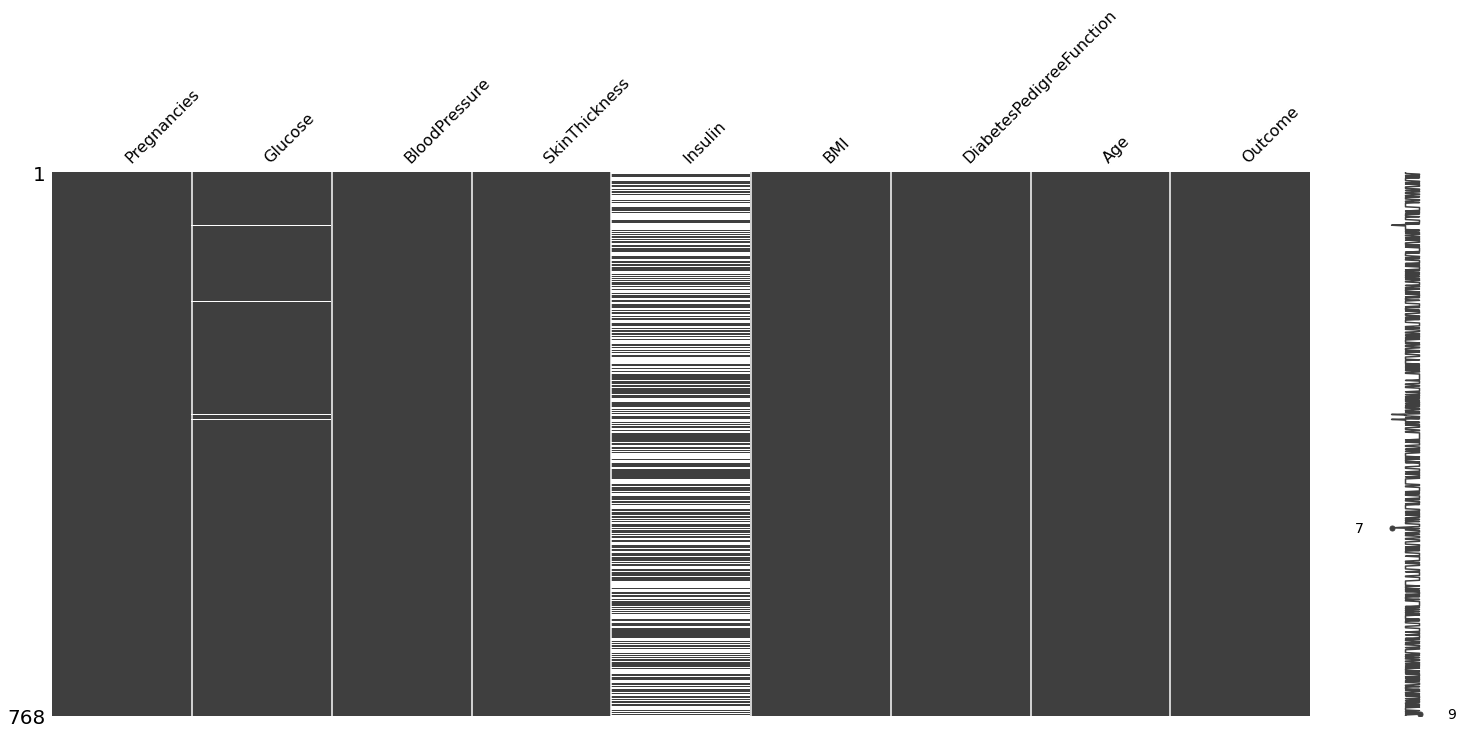

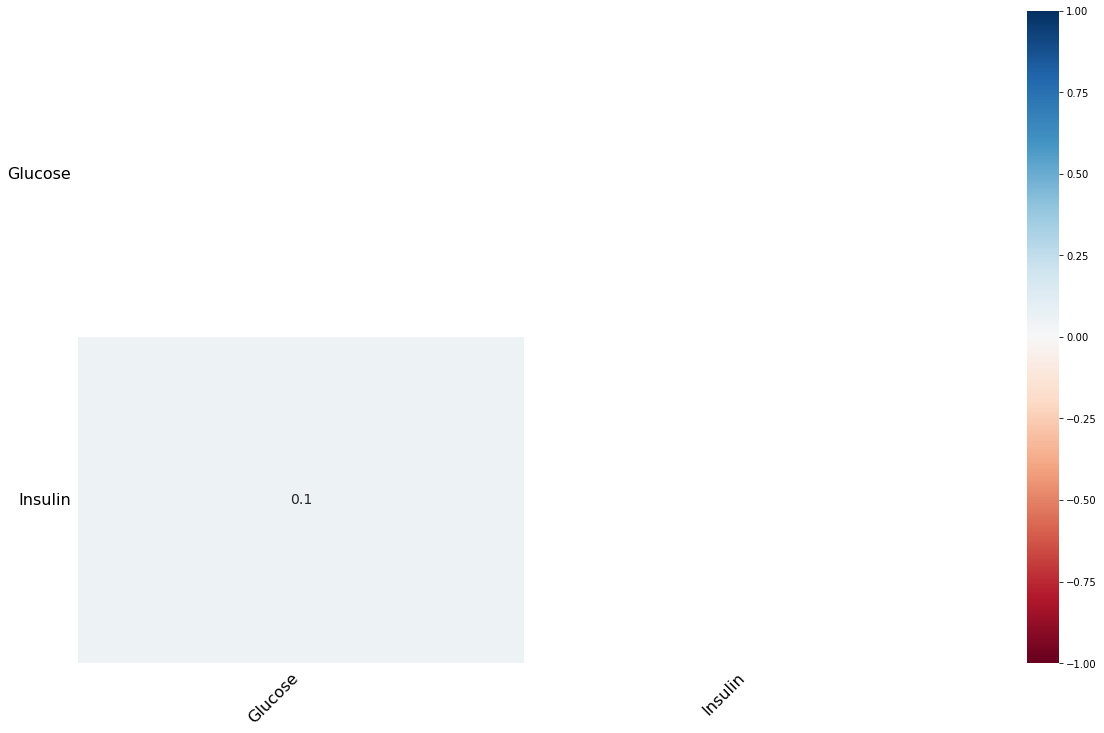

In [237]:
#############################################
# Gelişmiş Analizler
#############################################

###################
# Eksik Veri Yapısının İncelenmesi
###################

msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()

In [238]:
###################
# Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi
###################

na_cols = missing_values_table(df, True)


def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, target, na_cols)

         n_miss  ratio
Insulin     374 48.700
Glucose       5  0.650
                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.349    763
1                      0.400      5


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.330    394
1                      0.369    374




In [203]:
#df["Age"].quantile([0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])

0.050   21.000
0.100   22.000
0.150   22.000
0.200   23.000
0.300   25.000
0.400   27.000
0.500   29.000
0.600   33.000
0.700   38.000
0.800   42.600
0.850   46.000
0.900   51.000
0.950   58.000
Name: Age, dtype: float64

In [ ]:
# ####  Görev 2 : Feature Engineering
# Adım 1: Eksik ve aykırı değerler için gerekli işlemleri yapınız. Veri setinde eksik gözlem bulunmamakta ama Glikoz, Insulin vb. 
# değişkenlerde 0 değeri içeren gözlem birimleri eksik değeri ifade ediyor olabilir. Örneğin; bir kişinin glikoz veya insulin değeri 0 
# olamayacaktır. Bu durumu dikkate alarak sıfır değerlerini ilgili değerlerde NaN olarak atama yapıp sonrasında eksik 
# değerlere işlemleri uygulayabilirsiniz.
# Adım 2: Yeni değişkenler oluşturunuz.
# Adım 3: Encoding işlemlerini gerçekleştiriniz.
# Adım 4: Numerik değişkenler için standartlaştırma yapınız.
# Adım 5: Model oluşturunuz.


In [239]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72,35,NaN,33.600,0.627,50.000,1
1,1,85.000,66,29,NaN,26.600,0.351,31.000,0
2,8,183.000,64,0,NaN,23.300,0.672,32.000,1
3,1,89.000,66,23,94.000,28.100,0.167,21.000,0
4,0,137.000,40,35,168.000,43.100,2.288,33.000,1
...,...,...,...,...,...,...,...,...,...
763,10,101.000,76,48,180.000,32.900,0.171,63.000,0
764,2,122.000,70,27,NaN,36.800,0.340,27.000,0
765,5,121.000,72,23,112.000,26.200,0.245,30.000,0
766,1,126.000,60,0,NaN,30.100,0.349,47.000,1


In [342]:
df["Age/Pregnancies"]=df["Age"]/df["Pregnancies"]
df["Age/BloodPressure"]=df["Age"]/df["BloodPressure"]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age/Pregnancies,Age/BloodPressure
0,6,148.000,72,35,NaN,33.600,0.627,50,1,8.333,0.694
1,1,85.000,66,29,NaN,26.600,0.351,31,0,31.000,0.470
2,8,183.000,64,0,NaN,23.300,0.672,32,1,4.000,0.500
3,1,89.000,66,23,94.000,28.100,0.167,21,0,21.000,0.318
4,0,137.000,40,35,168.000,43.100,2.288,33,1,inf,0.825
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.000,76,48,180.000,32.900,0.171,63,0,6.300,0.829
764,2,122.000,70,27,NaN,36.800,0.340,27,0,13.500,0.386
765,5,121.000,72,23,112.000,26.200,0.245,30,0,6.000,0.417
766,1,126.000,60,0,NaN,30.100,0.349,47,1,47.000,0.783


In [343]:
df["Age_"]=""

df.loc[df[df["Age"]<30].index,"Age_"]="0_30"
df.loc[df[df["Age"]>=30][df["Age"]<40].index,"Age_"]="30_40"
df.loc[df[df["Age"]>=40].index,"Age_"]="40_+"
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age/Pregnancies,Age/BloodPressure,Age_
0,6,148.000,72,35,NaN,33.600,0.627,50,1,8.333,0.694,40_+
1,1,85.000,66,29,NaN,26.600,0.351,31,0,31.000,0.470,30_40
2,8,183.000,64,0,NaN,23.300,0.672,32,1,4.000,0.500,30_40
3,1,89.000,66,23,94.000,28.100,0.167,21,0,21.000,0.318,0_30
4,0,137.000,40,35,168.000,43.100,2.288,33,1,inf,0.825,30_40
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.000,76,48,180.000,32.900,0.171,63,0,6.300,0.829,40_+
764,2,122.000,70,27,NaN,36.800,0.340,27,0,13.500,0.386,0_30
765,5,121.000,72,23,112.000,26.200,0.245,30,0,6.000,0.417,30_40
766,1,126.000,60,0,NaN,30.100,0.349,47,1,47.000,0.783,40_+


In [344]:
###################
# Numeric to Categorical: Sayısal Değişkenleri Kateorik Değişkenlere Çevirme
# Binning
###################

df["Age_qcut"] = pd.qcut(df['Age'], 5) 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age/Pregnancies,Age/BloodPressure,Age_,Age_qcut
0,6,148.000,72,35,NaN,33.600,0.627,50,1,8.333,0.694,40_+,"(42.6, 81.0]"
1,1,85.000,66,29,NaN,26.600,0.351,31,0,31.000,0.470,30_40,"(27.0, 33.0]"
2,8,183.000,64,0,NaN,23.300,0.672,32,1,4.000,0.500,30_40,"(27.0, 33.0]"
3,1,89.000,66,23,94.000,28.100,0.167,21,0,21.000,0.318,0_30,"(20.999, 23.0]"
4,0,137.000,40,35,168.000,43.100,2.288,33,1,inf,0.825,30_40,"(27.0, 33.0]"


In [345]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    
    return dataframe

# cat_cols, num_cols, cat_but_car = grab_col_names(df)

ohe_cols = [col for col in df.columns if 20 >= df[col].nunique() > 2]
print(ohe_cols)


df2=one_hot_encoder(df, ohe_cols).head()
df2

['Pregnancies', 'Age_', 'Age_qcut']


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age/Pregnancies,Age/BloodPressure,Pregnancies_1,Pregnancies_2,...,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17,Age__30_40,Age__40_+,"Age_qcut_(23.0, 27.0]","Age_qcut_(27.0, 33.0]","Age_qcut_(33.0, 42.6]","Age_qcut_(42.6, 81.0]"
0,148.000,72,35,NaN,33.600,0.627,50,1,8.333,0.694,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1
1,85.000,66,29,NaN,26.600,0.351,31,0,31.000,0.470,1,0,...,0,0,0,0,0,0,1,0,0,1,0,0
2,183.000,64,0,NaN,23.300,0.672,32,1,4.000,0.500,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0
3,89.000,66,23,94.000,28.100,0.167,21,0,21.000,0.318,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,137.000,40,35,168.000,43.100,2.288,33,1,inf,0.825,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0


In [338]:
#one hot encoding yapmaya gerek olmayan kolonlar---eksik kaldı.tamamla!!!!!!!!!!!!!!!!1


new_ohe_cols=[]
for col in df.columns:

    ls=list(df[col].unique())
    ls2=ls
    #print(ls)
    if np.nan in ls:
        ls2=ls
        ls2.remove(np.nan)
    degiskende_sadece_sayilar_mi_var=all([isinstance(item, int) for item in ls2])
    if degiskende_sadece_sayilar_mi_var:
        new_ohe_cols.append(col)
new_ohe_cols
    
    

[]

In [346]:
def col_nan_oluştur(df):
    for col in df.columns:
        if df[col].isna().any():
            df[col+"_nan"]=0
            df.loc[df[col].isna(),col+"_nan"]=1
    return df
df=col_nan_oluştur(df)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age/Pregnancies,Age/BloodPressure,Age_,Age_qcut,Glucose_nan,Insulin_nan
0,6,148.000,72,35,NaN,33.600,0.627,50,1,8.333,0.694,40_+,"(42.6, 81.0]",0,1
1,1,85.000,66,29,NaN,26.600,0.351,31,0,31.000,0.470,30_40,"(27.0, 33.0]",0,1
2,8,183.000,64,0,NaN,23.300,0.672,32,1,4.000,0.500,30_40,"(27.0, 33.0]",0,1
3,1,89.000,66,23,94.000,28.100,0.167,21,0,21.000,0.318,0_30,"(20.999, 23.0]",0,0
4,0,137.000,40,35,168.000,43.100,2.288,33,1,inf,0.825,30_40,"(27.0, 33.0]",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.000,76,48,180.000,32.900,0.171,63,0,6.300,0.829,40_+,"(42.6, 81.0]",0,0
764,2,122.000,70,27,NaN,36.800,0.340,27,0,13.500,0.386,0_30,"(23.0, 27.0]",0,1
765,5,121.000,72,23,112.000,26.200,0.245,30,0,6.000,0.417,30_40,"(27.0, 33.0]",0,0
766,1,126.000,60,0,NaN,30.100,0.349,47,1,47.000,0.783,40_+,"(42.6, 81.0]",0,1


In [348]:
ls

[0.6944444444444444,
 0.4696969696969697,
 0.5,
 0.3181818181818182,
 0.825,
 0.40540540540540543,
 0.52,
 inf,
 0.7571428571428571,
 0.5625,
 0.32608695652173914,
 0.4594594594594595,
 0.7125,
 0.9833333333333333,
 0.7083333333333334,
 0.36904761904761907,
 0.4189189189189189,
 1.1,
 0.45714285714285713,
 0.3068181818181818,
 0.5952380952380952,
 0.45555555555555555,
 0.3625,
 0.5425531914893617,
 0.5857142857142857,
 0.5657894736842105,
 0.3333333333333333,
 0.6951219512195121,
 0.41304347826086957,
 0.8,
 0.3684210526315789,
 0.3793103448275862,
 0.30434782608695654,
 0.5769230769230769,
 0.55,
 0.4605263157894737,
 0.6052631578947368,
 0.39705882352941174,
 0.7777777777777778,
 0.40625,
 0.44047619047619047,
 0.5217391304347826,
 0.4909090909090909,
 0.625,
 0.3787878787878788,
 0.5178571428571429,
 0.3142857142857143,
 0.275,
 0.45454545454545453,
 0.6444444444444445,
 0.6363636363636364,
 0.42,
 0.6029411764705882,
 0.3522727272727273,
 0.5365853658536586,
 0.34375,
 0.5416666666

In [351]:
mms = MinMaxScaler()
for col in df.columns:
    if df[col].nunique()>20:
        ls=list(df[col].unique())
    if np.nan not in ls:
        degiskende_sadece_sayilar_mi_var=(all([isinstance(item, int) for item in ls2]),all([isinstance(item, float) for item in ls2]))
        
        if degiskende_sadece_sayilar_mi_var:
            try:
                df[col] = mms.fit_transform(df[[col]])
            except:
                print("HATA VAR")
df

HATA VAR
HATA VAR
HATA VAR
HATA VAR


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age/Pregnancies,Age/BloodPressure,Age_,Age_qcut,Glucose_nan,Insulin_nan
0,0.353,0.671,0.590,0.354,NaN,0.501,0.234,0.483,1.000,8.333,0.694,40_+,"(42.6, 81.0]",0.000,1.000
1,0.059,0.265,0.541,0.293,NaN,0.396,0.117,0.167,0.000,31.000,0.470,30_40,"(27.0, 33.0]",0.000,1.000
2,0.471,0.897,0.525,0.000,NaN,0.347,0.254,0.183,1.000,4.000,0.500,30_40,"(27.0, 33.0]",0.000,1.000
3,0.059,0.290,0.541,0.232,0.096,0.419,0.038,0.000,0.000,21.000,0.318,0_30,"(20.999, 23.0]",0.000,0.000
4,0.000,0.600,0.328,0.354,0.185,0.642,0.944,0.200,1.000,inf,0.825,30_40,"(27.0, 33.0]",0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.588,0.368,0.623,0.485,0.200,0.490,0.040,0.700,0.000,6.300,0.829,40_+,"(42.6, 81.0]",0.000,0.000
764,0.118,0.503,0.574,0.273,NaN,0.548,0.112,0.100,0.000,13.500,0.386,0_30,"(23.0, 27.0]",0.000,1.000
765,0.294,0.497,0.590,0.232,0.118,0.390,0.071,0.150,0.000,6.000,0.417,30_40,"(27.0, 33.0]",0.000,0.000
766,0.059,0.529,0.492,0.000,NaN,0.449,0.116,0.433,1.000,47.000,0.783,40_+,"(42.6, 81.0]",0.000,1.000


In [352]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age/Pregnancies,Age/BloodPressure,Age_,Age_qcut,Glucose_nan,Insulin_nan
0,0.353,0.671,0.590,0.354,NaN,0.501,0.234,0.483,1.000,8.333,0.694,40_+,"(42.6, 81.0]",0.000,1.000
1,0.059,0.265,0.541,0.293,NaN,0.396,0.117,0.167,0.000,31.000,0.470,30_40,"(27.0, 33.0]",0.000,1.000
2,0.471,0.897,0.525,0.000,NaN,0.347,0.254,0.183,1.000,4.000,0.500,30_40,"(27.0, 33.0]",0.000,1.000
3,0.059,0.290,0.541,0.232,0.096,0.419,0.038,0.000,0.000,21.000,0.318,0_30,"(20.999, 23.0]",0.000,0.000
4,0.000,0.600,0.328,0.354,0.185,0.642,0.944,0.200,1.000,inf,0.825,30_40,"(27.0, 33.0]",0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.588,0.368,0.623,0.485,0.200,0.490,0.040,0.700,0.000,6.300,0.829,40_+,"(42.6, 81.0]",0.000,0.000
764,0.118,0.503,0.574,0.273,NaN,0.548,0.112,0.100,0.000,13.500,0.386,0_30,"(23.0, 27.0]",0.000,1.000
765,0.294,0.497,0.590,0.232,0.118,0.390,0.071,0.150,0.000,6.000,0.417,30_40,"(27.0, 33.0]",0.000,0.000
766,0.059,0.529,0.492,0.000,NaN,0.449,0.116,0.433,1.000,47.000,0.783,40_+,"(42.6, 81.0]",0.000,1.000


In [359]:
dff = pd.get_dummies(df, columns=["Age_","Age_qcut"], drop_first=True)
dff

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age/Pregnancies,Age/BloodPressure,Glucose_nan,Insulin_nan,Age__30_40,Age__40_+,"Age_qcut_(23.0, 27.0]","Age_qcut_(27.0, 33.0]","Age_qcut_(33.0, 42.6]","Age_qcut_(42.6, 81.0]"
0,0.353,0.671,0.590,0.354,NaN,0.501,0.234,0.483,1.000,8.333,0.694,0.000,1.000,0,1,0,0,0,1
1,0.059,0.265,0.541,0.293,NaN,0.396,0.117,0.167,0.000,31.000,0.470,0.000,1.000,1,0,0,1,0,0
2,0.471,0.897,0.525,0.000,NaN,0.347,0.254,0.183,1.000,4.000,0.500,0.000,1.000,1,0,0,1,0,0
3,0.059,0.290,0.541,0.232,0.096,0.419,0.038,0.000,0.000,21.000,0.318,0.000,0.000,0,0,0,0,0,0
4,0.000,0.600,0.328,0.354,0.185,0.642,0.944,0.200,1.000,inf,0.825,0.000,0.000,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.588,0.368,0.623,0.485,0.200,0.490,0.040,0.700,0.000,6.300,0.829,0.000,0.000,0,1,0,0,0,1
764,0.118,0.503,0.574,0.273,NaN,0.548,0.112,0.100,0.000,13.500,0.386,0.000,1.000,0,0,1,0,0,0
765,0.294,0.497,0.590,0.232,0.118,0.390,0.071,0.150,0.000,6.000,0.417,0.000,0.000,1,0,0,1,0,0
766,0.059,0.529,0.492,0.000,NaN,0.449,0.116,0.433,1.000,47.000,0.783,0.000,1.000,0,1,0,0,0,1


In [360]:
#############################################
# 8. Model
#############################################
dff.replace([np.inf, -np.inf], np.nan, inplace=True)
dff=dff.fillna(0)


y = dff["Outcome"]
X = dff.drop([ "Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7575757575757576